# Лабораторная работа №1
## Жерлыгин М.А.
## 80-408Б

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from pylab import rcParams
area = (-5, 5)
colors = {(0,) : 'r', (1,) : 'y', (0, 0) : 'r', (0, 1) : 'g', (1, 0) : 'b', (1, 1) : 'y'}

In [2]:
def get_data(filename):
    with open(filename) as f:
        num_of_input = int(f.readline())
        num_of_output = int(f.readline())
        tmp = np.array([[float(num) for num in line.split(' ')] for line in f])
        columns = [f'X{i+1}' for i in range(num_of_input)] + [f'Y{i+1}' for i in range(num_of_output)]
        df = pd.DataFrame(tmp.T, columns=columns)
        df.insert(0, 'X0', [1] * df.shape[0])
    return df

In [3]:
def dividing_line_func(coef):
    return lambda x: (-coef[0] - coef[1] * x) / coef[2]

In [4]:
def plot_df1(df):
    plt.grid(True)
    plt.plot(df[df['Y1'] == 0]['X1'], df[df['Y1'] == 0]['X2'], 'o', c=colors[(0,)])
    plt.plot(df[df['Y1'] == 1]['X1'], df[df['Y1'] == 1]['X2'], 'o', c=colors[(1,)])

In [5]:
def plot_df2(df2):
    plt.grid(True)
    f = lambda x, y: df2[(df2['Y1'] == x) & (df2['Y2'] == y)][['X1', 'X2']]
    plt.plot(f(0, 0)['X1'], f(0, 0)['X2'], 'o', c=colors[(0, 0)])
    plt.plot(f(0, 1)['X1'], f(0, 1)['X2'], 'o', c=colors[(0, 1)])
    plt.plot(f(1, 0)['X1'], f(1, 0)['X2'], 'o', c=colors[(1, 0)])
    plt.plot(f(1, 1)['X1'], f(1, 1)['X2'], 'o', c=colors[(1, 1)])

In [6]:
def out(x):
    return np.array([1 if i >= 0 else 0 for i in x])

In [7]:
def train(df, n_input, n_neurouns, eta=0.3, log_file=None, max_iter=1e6):
    if log_file is not None:
        f = open(log_file, 'w')
    x = df.iloc[:, :n_input]
    y = df.iloc[:, n_input:]
    w = np.random.uniform(-2, 2, (n_input, n_neurouns))
    idx = 0
    k_iter = 0
    while True:
        if log_file is not None:
            f.write(f'Step {idx}:\nIter {k_iter}\n{w}\n')
        if idx == df.shape[0] or k_iter == max_iter:
            break
        tmp = x.iloc[idx] @ w
        res = out(tmp)
        if all(res == y.iloc[idx]):
            idx += 1
        else:
            err = y.iloc[idx] - res
            if log_file is not None:
                f.write(f'Err:\n{err}\n')
                f.write(f'X:\n{x.iloc[idx]}\n')
                f.write(f'Y:\n{y.iloc[idx]}\n')
                f.write(f'Out\n{res}\n')
            w += np.array([[eta * i * j for j in err] for i in x.iloc[idx]])
            idx = 0
        k_iter += 1
    if log_file is not None:
        f.close()
    return w

In [8]:
def predict(x, w):
    return out(x @ w)

## Датасет 1

,X0,X1,X2,Y1
0,1,-3.8,0.4,1.0
1,1,-0.2,3.9,1.0
2,1,2.9,2.3,0.0
3,1,-4.5,-4.3,0.0
4,1,-4.2,2.9,1.0
5,1,4.4,1.8,0.0


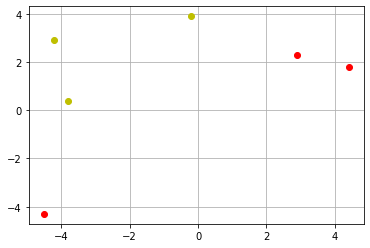

In [24]:
df = get_data('test1.txt')
display(df)
plot_df1(df)

## Датасет 2

,X0,X1,X2,Y1,Y2
0,1,-0.6,4.0,1.0,1.0
1,1,-4.7,0.3,1.0,1.0
2,1,2.1,-3.3,0.0,0.0
3,1,-1.7,-3.2,0.0,0.0
4,1,-1.8,-1.0,0.0,1.0
5,1,0.4,-4.6,0.0,0.0
6,1,0.5,-2.3,0.0,0.0
7,1,-2.6,-2.6,0.0,0.0


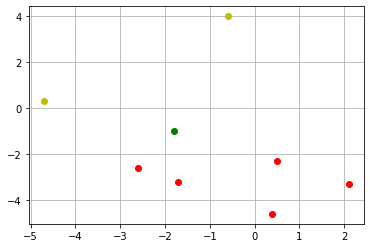

In [10]:
df2 = get_data('test2.txt')
display(df2)
plot_df2(df2)

In [11]:
rand_points = np.random.uniform(-5, 5, (5, 2))
ones = np.ones((5, 3))
ones[:, 1:] = rand_points
rand_points = ones

In [12]:
w1 = train(df, 3, 1, eta=0.3, log_file='df1.txt', max_iter=50)

In [13]:
pred = [tuple(predict(line, w1)) for line in rand_points]

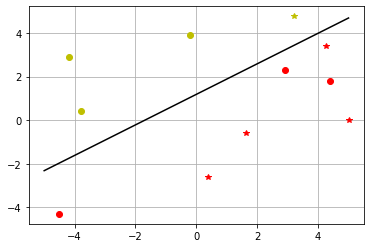

In [14]:
plot_df1(df)
tmp_f = dividing_line_func(w1)
plt.plot(area, [tmp_f(i) for i in area], c='black')
for x, y, c in zip(rand_points[:, 1], rand_points[:, 2], pred):
    plt.plot(x, y, '*', c=colors[c])

In [15]:
w2 = train(df2, 3, 2, eta=0.3, log_file='df2.txt', max_iter=50)

In [16]:
pred = [tuple(predict(line, w2)) for line in rand_points]

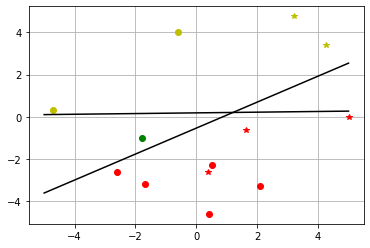

In [17]:
plot_df2(df2)
tmp_f = dividing_line_func(w2[:, 0])
plt.plot(area, [tmp_f(i) for i in area], c='black')
tmp_f = dividing_line_func(w2[:, 1])
plt.plot(area, [tmp_f(i) for i in area], c='black')

for x, y, c in zip(rand_points[:, 1], rand_points[:, 2], pred):
    plt.plot(x, y, '*', c=colors[c])

## Линейная неразделимость для первой выборки

In [18]:
df.loc[6] = [0, -2, 1, 0]

In [19]:
w1 = train(df, 3, 1, eta=0.3, log_file='df1_insep.txt', max_iter=50)

In [20]:
pred = [tuple(predict(line, w1)) for line in rand_points]

,X0,X1,X2,Y1
0,1,-3.8,0.4,1.0
1,1,-0.2,3.9,1.0
2,1,2.9,2.3,0.0
3,1,-4.5,-4.3,0.0
4,1,-4.2,2.9,1.0
5,1,4.4,1.8,0.0
6,0,-2.0,1.0,0.0


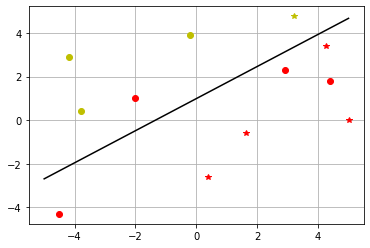

In [22]:
display(df)
plot_df1(df)
tmp_f = dividing_line_func(w1)
plt.plot(area, [tmp_f(i) for i in area], c='black')

for x, y, c in zip(rand_points[:, 1], rand_points[:, 2], pred):
    plt.plot(x, y, '*', c=colors[c])